# Derivatives

Priyanshu Mahato, Oct 2023

## 1. Mathematical definition of a derivative

<img src="figure_04_derivatives.png" alt="Derivative"/>

\\( f'(x)=\lim_{h\rightarrow 0}\frac{f(x+h)-f(x)}{h}\\)

\\( f'(x)=\lim_{h\rightarrow 0}\frac{f(x)-f(x-h)}{h}\\)

\\( f'(x)=\lim_{h\rightarrow 0}\frac{f(x+h)-f(x-h)}{2h}\\)

All three definitions are equivalent in case of a continuous function.

## 2. Numerical implementation of first-order derivatives

Forward differences
\\( f'(x_n)\approx\frac{f(x_{n+1})-f(x_n)}{x_{n+1}-x_n}\\)

Backward differences
\\( f'(x)\approx\frac{f(x_n)-f(x_{n-1})}{x_n-x_{n-1}}\\)

Central differences
\\( f'(x)\approx\frac{f(x_{n+1})-f(x_{n-1})}{x_{n+1}-x_{n-1}}\\)

### Example function: \\( f(x)=\sin(x)x-\frac{1}{100}x^3 \\)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Why is central differences (typically) better than forward and backward differences?

Forward differences
\\( f'(x)=\frac{f(x+h)-f(x)}{h}+\mathcal{O}(h)\\)

Backward differences
\\( f'(x)=\frac{f(x)-f(x-h)}{h}+\mathcal{O}(h)\\)

Central differences
\\( f'(x)=\frac{f(x+h)-f(x-h)}{2h}+\mathcal{O}(h^2)\\)

- \\(\mathcal{O}(h^n)\\) means that the error is proportional to h^n.
- Since \\(h\\) is small, the central differences method is more accurate. Why?

Taylor expansion: 

\\(f(x+h)=f(x)+f'(x)h+\frac{1}{2}f''(x)h^2+\frac{1}{6}f'''(x)h^3+\dots\\)

\\(f(x-h)=f(x)-f'(x)h+\frac{1}{2}f''(x)h^2-\frac{1}{6}f'''(x)h^3\pm\dots\\)

- From the first and second line we can imediately see the  \\(\mathcal{O}(h)\\) dependence of the forward and backward differences methods

\\(f'(x)=\frac{1}{h}\left[f(x+h)-f(x)-\frac{1}{2}f''(x)h^2-\frac{1}{6}f'''(x)h^3+\dots\right]=\frac{f(x+h)-f(x)}{h}-\frac{1}{2}f''(x)h-\frac{1}{6}f'''(x)h^2+\dots\\)

\\(f'(x)=\frac{1}{h}\left[f(x)-f(x-h)+\frac{1}{2}f''(x)h^2-\frac{1}{6}f'''(x)h^3\pm\dots\right]=\frac{f(x)-f(x-h)}{h}+\frac{1}{2}f''(x)h-\frac{1}{6}f'''(x)h^2\pm\dots\\)


- To find the \\(\mathcal{O}(h^2)\\) dependence of the central differences method, we have to subtract the two terms

\\(f(x+h)-f(x-h)=2f'(x)h+\frac{1}{3}f'''(x)h^3+\dots\\)

\\(\frac{1}{2h}\left[f(x+h)-f(x-h)\right]=f'(x)+\frac{1}{6}f'''(x)h^2+\dots\\)

\\( f'(x)=\frac{f(x+h)-f(x-h)}{2h}+\mathcal{O}(h^2)\\)

### Higher accuracy:

Richardson: \\(f'(x)=\frac{1}{12h}\left[f(x-2h)-8f(x-h)+8f(x+h)-f(x+2h)\right]+\mathcal{O}(h^4)\\)

### Even higher accuracy

Iteration formula:

\\(D_{n+1}=\frac{2^{2n}D_n(h)-D_n(2h)}{2^{2n}-1}\\)

Calculate f'(x) for \\( f(x)=\sin(x)x-\frac{1}{100}x^3 \\) at \\(x = 3\\)

Comparison to D1Richardson

Analytical result: \\( f'(3)=3\cos(3)+\sin(3)-\frac{3}{100}\cdot 3^2 \\)

## 3. Second derivatives

We derive \\(f'(x)\\) another time

\\( f''(x)=\lim_{h\rightarrow 0}\frac{f'(x+h)-f'(x)}{h}\\)

\\( f''(x)=\lim_{h\rightarrow 0}\frac{f'(x)-f'(x-h)}{h}\\)

\\( f''(x)=\lim_{h\rightarrow 0}\frac{f'(x+h)-f'(x-h)}{2h}\\)

This gives us many possibilities for the definition of \\(f''(x)\\) based on \\(f(x)\\), e. g.

- Double forward & double backward

\\(f''(x)=\lim_{h\rightarrow 0}\frac{\left[f(x+2h)-f(x+h)\right]-\left[f(x+h)-f(x)\right]}{h^2}=\lim_{h\rightarrow 0}\frac{f(x+2h)-2f(x+h)+f(x)}{h^2}\\)

\\(f''(x)=\lim_{h\rightarrow 0}\frac{\left[f(x)-f(x-h)\right]-\left[f(x-h)-f(x-2h)\right]}{h^2}=\lim_{h\rightarrow 0}\frac{f(x)-2f(x-h)+f(x-2h)}{h^2}\\)

- Forward and backward

\\(f''(x)=\lim_{h\rightarrow 0}\frac{\left[f(x+h)-f(x)\right]-\left[f(x)-f(x-h)\right]}{h^2}=\lim_{h\rightarrow 0}\frac{f(x+h)-2f(x)+f(x-h)}{h^2}\\)

- Double central (same result as forward and backward for \\(2h=g\\))

\\(f''(x)=\lim_{h\rightarrow 0}\frac{\left[f(x+2h)-f(x)\right]-\left[f(x)-f(x-2h)\right]}{(2h)^2}=\lim_{h\rightarrow 0}\frac{f(x+2h)-2f(x)+f(x-2h)}{4h^2}=\lim_{g\rightarrow 0}\frac{f(x+g)-2f(x)+f(x-g)}{g^2}\\)

### Higher accuracy:

Richardson: \\(f''(x)=\frac{1}{12h^2}\left[-f(x-2h)+16f(x-h)-30f(x)+16f(x+h)-f(x+2h)\right]+\mathcal{O}(h^4)\\)

## 4. Gradient, Divergence & Curl

Now we consider a multidimensional function which means, the function depends on multiple variables 

\\( f(x,y,z)\\)

or it is a function that has multiple dimensions itself

\\( \vec{g}(x,y,z)=\begin{pmatrix}g_x(x,y,z)\\g_y(x,y,z)\\g_z(x,y,z)\end{pmatrix}\\)

With the nabla operator \\( \nabla = \begin{pmatrix}\frac{\partial}{\partial x}\\\frac{\partial}{\partial y}\\\frac{\partial}{\partial z}\end{pmatrix}\\) we can calculate:

- gradient \\( \nabla f(x,y,z) = \begin{pmatrix}\frac{\partial}{\partial x}f(x,y,z)\\\frac{\partial}{\partial y}f(x,y,z)\\\frac{\partial}{\partial z}f(x,y,z)\end{pmatrix}\\)

- curl \\(\nabla\times \vec{g}(x,y,z) = \begin{pmatrix}
\frac{\partial}{\partial y}g_z(x,y,z) - \frac{\partial}{\partial z}g_y(x,y,z)\\
\frac{\partial}{\partial z}g_x(x,y,z) - \frac{\partial}{\partial x}g_z(x,y,z)\\
\frac{\partial}{\partial x}g_y(x,y,z) - \frac{\partial}{\partial y}g_x(x,y,z)\\
\end{pmatrix}\\)

- divergence \\(\nabla\cdot \vec{g}(x,y,z) = \frac{\partial}{\partial x}g_x(x,y,z)+\frac{\partial}{\partial y}g_y(x,y,z)+\frac{\partial}{\partial z}g_z(x,y,z)\\)

### Example 

\\(
f(\vec{r})=f(x,y,z) = \exp(-x^2-y^4)
\\)

\\(
\vec{g}(\vec{r})=\frac{\vec{r}}{r}=\begin{pmatrix}x/\sqrt{x^2+y^2+z^2}\\y/\sqrt{x^2+y^2+z^2}\\z/\sqrt{x^2+y^2+z^2}\end{pmatrix}
\\)

In [2]:
def f(r):
    return np.exp(-r[0]**2-r[1]**4)

def g(r):
    return r / np.linalg.norm(r)

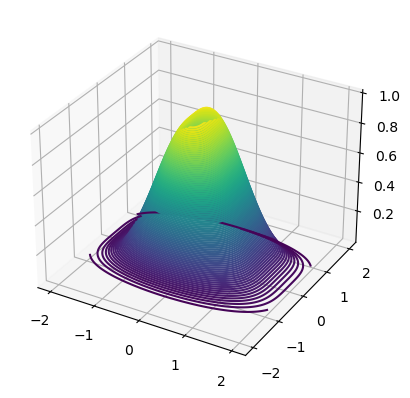

In [3]:
x3, y3 = np.meshgrid(np.linspace(-2,2,201),np.linspace(-2,2,201))
z3 = f( np.array([ x3, y3 ]) )

plotproj = plt.axes(projection='3d')
plotproj.contour3D(x3,y3,z3,100)

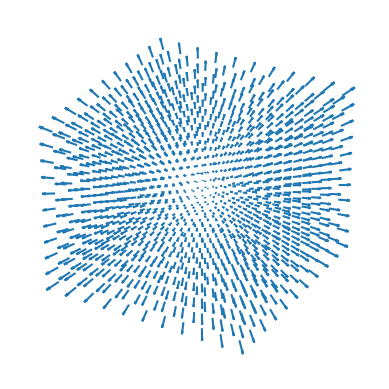

In [4]:
x3, y3, z3 = np.meshgrid(np.linspace(-2,2,11),np.linspace(-2,2,11),np.linspace(-2,2,11))
values = g( np.array([ x3, y3, z3 ]) )

arrowplot = plt.axes(projection='3d')
arrowplot.axis(False)

scale=7
arrowplot.quiver(
    x3, y3, z3,
    values[0]*scale,values[1]*scale,values[2]*scale
)

### Gradient

- analytical solution 

\\( \nabla f(x,y,z) = \begin{pmatrix}-2x\exp(-x^2-y^4)\\-4y^3\exp(-x^2-y^4)\\0\end{pmatrix} \\)

### Divergence

- analytical solution 

\\( \nabla \cdot \vec{g}(\vec{r}) = \frac{2}{r} \\)

### Curl

- analytical solution 

\\( \nabla \times \vec{g}(\vec{r}) = 0 \\)